In [5]:
import pandas as pd #helps us to read dataset / making dataframes / mainpukation of data frames ,basically it is key library 
import numpy as np #helps us in working arrays and matrics 
import seaborn as sns # it helps us to viz the data , data viz gives better understANDing and findings 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\Admin\Downloads\netflix1.csv\netflix1.csv')

In [3]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [7]:
df.shape

(8790, 10)

In [8]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [12]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

# adjust dtypes

In [29]:
def get_convert_dtype(list_of_c_ids):
    for list_of_c_id in list_of_c_ids:
        df[list_of_c_id] = df[list_of_c_id].apply(pd.to_datetime)
        # convert just columns "a" and "b" df[["a", "b"]] = df[["a", "b"]].apply(pd.to_numeric)
        #df[list_of_c_id] = df[list_of_c_id].astype(datetime)

In [30]:
get_convert_dtype(['date_added'])

In [31]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

# viz

In [63]:
df.type.value_counts()#it shows us counts of different categories in a given col

Movie      6126
TV Show    2664
Name: type, dtype: int64

Text(0.5, 1.0, 'count vs types of shows')

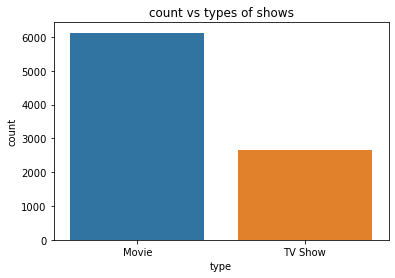

In [64]:
sns.countplot(x='type',data=df)
plt.title("count vs types of shows")

# country Analysis

In [65]:
df.country.value_counts(10)

United States     0.368601
India             0.120250
United Kingdom    0.072582
Pakistan          0.047895
Not Given         0.032651
                    ...   
Iran              0.000114
West Germany      0.000114
Greece            0.000114
Zimbabwe          0.000114
Soviet Union      0.000114
Name: country, Length: 86, dtype: float64

Text(0.5, 1.0, 'country wise content on netflix')

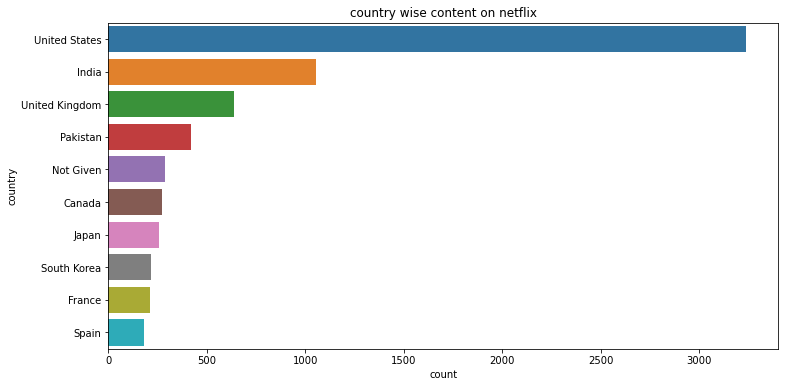

In [66]:
plt.figure(figsize=(12,6))
sns.countplot(y='country',order=df['country'].value_counts().index[0:10],data=df)
plt.title("country wise content on netflix")
#it is combine graph shows high rate of TV and movie shows was given by (US)

In [117]:
# here we see seprate result of movie and tv shows 
movie = df[df['type']=='Movie']
tv_show = df[df['type']=='TV Show']

In [118]:
movie

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
6,s10,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas"
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,2021-05-01,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu..."
...,...,...,...,...,...,...,...,...,...,...
8702,s8232,Movie,The Bund,Not Given,Hong Kong,2018-09-20,1983,TV-14,103 min,"Action & Adventure, Dramas, International Movies"
8707,s8269,Movie,The Darkest Dawn,Not Given,United Kingdom,2018-06-23,2016,TV-MA,75 min,"Action & Adventure, Independent Movies, Intern..."
8716,s8331,Movie,The Great Battle,Not Given,South Korea,2019-04-08,2018,TV-MA,136 min,"Action & Adventure, Dramas, International Movies"
8763,s8648,Movie,"Twisted Trunk, Big Fat Body",Not Given,India,2017-01-15,2015,TV-14,89 min,"Dramas, International Movies"


In [119]:
tv_show

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
17,s4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
18,s15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV


Text(0.5, 1.0, 'top 10 countryes producing movies on netflix')

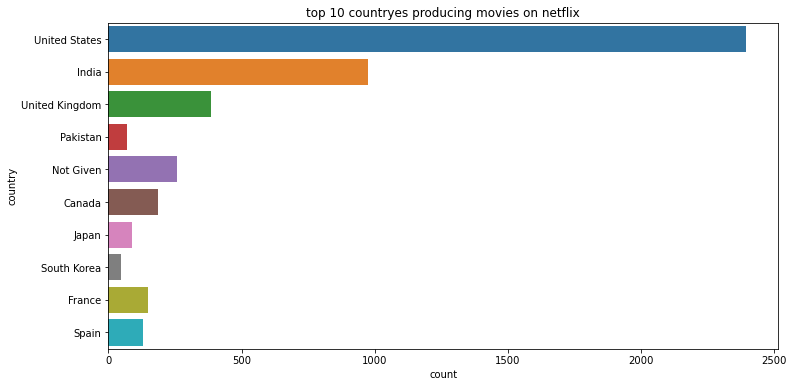

In [120]:
plt.figure(figsize=(12,6))
sns.countplot(y='country',order=df['country'].value_counts().index[0:10],data=movie)
plt.title("top 10 countryes producing movies on netflix")
#it is combine graph shows high rate of TV and movie shows was given by (US)

Text(0.5, 1.0, 'top 10 countryes producing Tv shows on netflix')

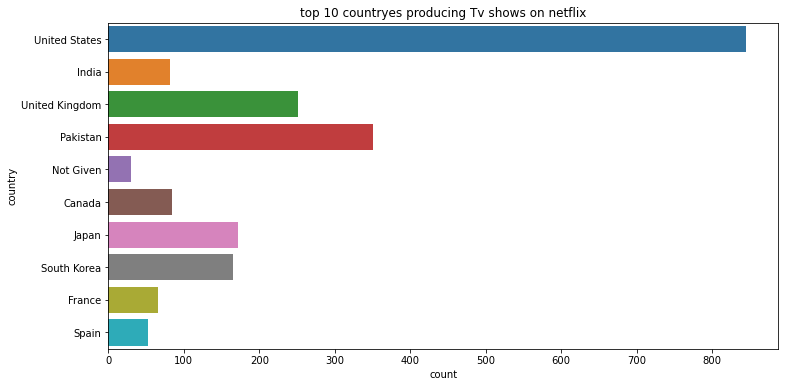

In [121]:
plt.figure(figsize=(12,6))
sns.countplot(y='country',order=df['country'].value_counts().index[0:10],data=tv_show)
plt.title("top 10 countryes producing Tv shows on netflix")
#it is combine graph shows high rate of TV and movie shows was given by (US)

In [79]:
df.rating.value_counts()
# now we want see which rating content produce at higher rate and which auidance targeted the most

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

Text(0.5, 1.0, 'rating of shows on netflix')

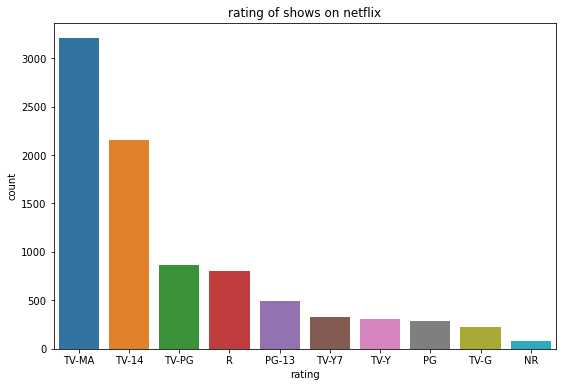

In [80]:
plt.figure(figsize=(9,6))
sns.countplot(x='rating',order=df['rating'].value_counts().index[0:10],data=df)
plt.title("rating of shows on netflix")
#it is combine graph shows high rate of TV and movie shows was given by (US)

Text(0.5, 1.0, 'top 10 rating of movies on netflix')

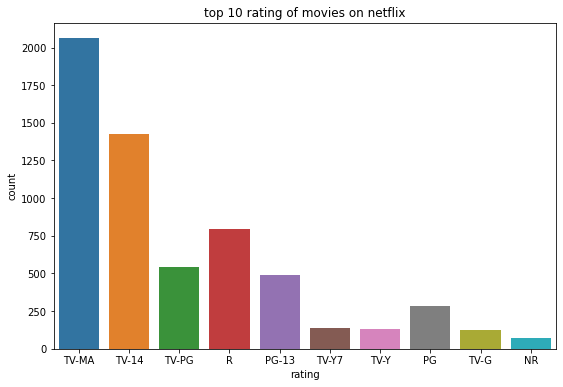

In [130]:
plt.figure(figsize=(9,6))
sns.countplot(x='rating',order=df['rating'].value_counts().index[0:10],data=movie)
plt.title("top 10 rating of movies on netflix")
#it is combine graph shows high rate of TV and movie shows was given by (US)

Text(0.5, 1.0, 'top 10 rating of Tv shows on netflix')

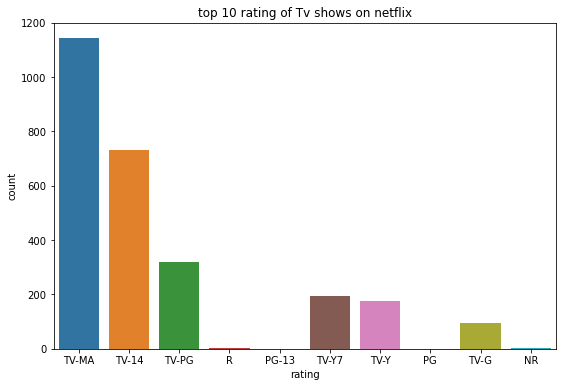

In [131]:
plt.figure(figsize=(9,6))
sns.countplot(x='rating',order=df['rating'].value_counts().index[0:10],data=tv_show)
plt.title("top 10 rating of Tv shows on netflix")
#it is combine graph shows high rate of TV and movie shows was given by (US)

In [81]:
df.release_year.value_counts()[:20]
#now we want to see in which netflix produce high amount of content 

2018    1146
2017    1030
2019    1030
2020     953
2016     901
2021     592
2015     555
2014     352
2013     286
2012     236
2010     192
2011     185
2009     152
2008     135
2006      96
2007      88
2005      80
2004      64
2003      59
2002      51
Name: release_year, dtype: int64

Text(0.5, 1.0, 'content releas in years on netflix')

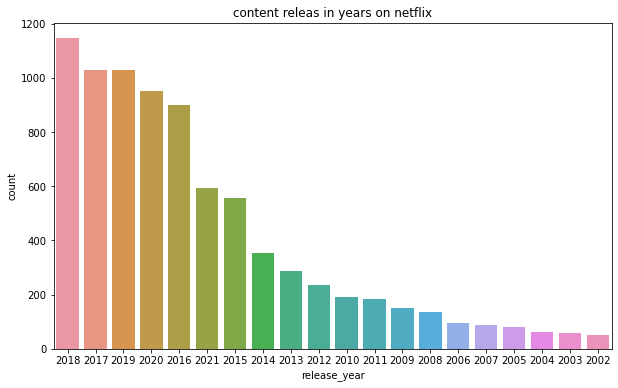

In [82]:
plt.figure(figsize=(10,6))
sns.countplot(x='release_year',order=df['release_year'].value_counts().index[0:20],data=df)
plt.title("content releas in years on netflix")
#it is combine graph shows high rate of TV and movie shows was given by (US)

Text(0.5, 1.0, 'top 20 movie content releas in years on netflix')

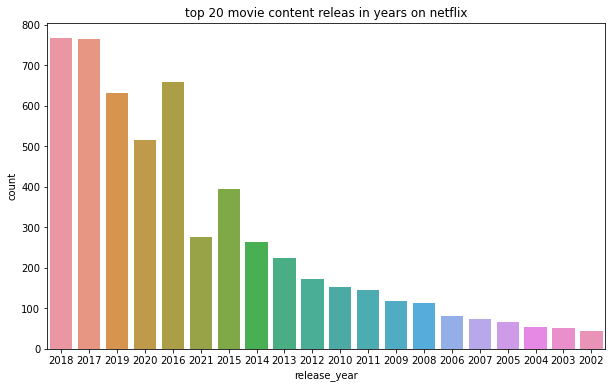

In [132]:
plt.figure(figsize=(10,6))
sns.countplot(x='release_year',order=df['release_year'].value_counts().index[0:20],data=movie)
plt.title("top 20 movie content releas in years on netflix")
#it is combine graph shows high rate of TV and movie shows was given by (US)

Text(0.5, 1.0, 'top 20 Tv show content releas in years on netflix')

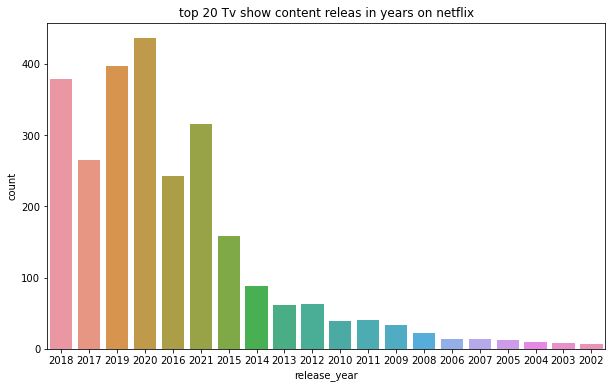

In [133]:
plt.figure(figsize=(10,6))
sns.countplot(x='release_year',order=df['release_year'].value_counts().index[0:20],data=tv_show)
plt.title("top 20 Tv show content releas in years on netflix")
#it is combine graph shows high rate of TV and movie shows was given by (US)

# popular Genres Analysis

Text(0.5, 1.0, 'Top 20 Genres on netflix')

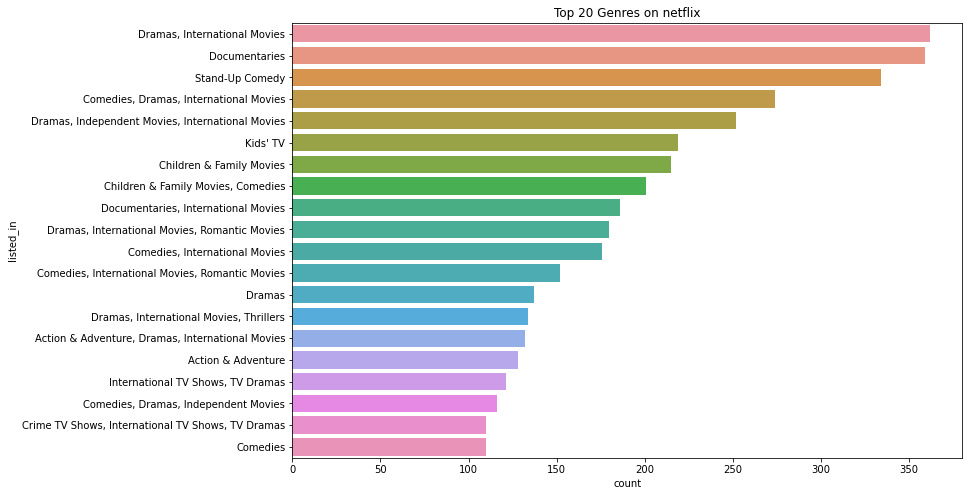

In [84]:
plt.figure(figsize=(12,8))
sns.countplot(y='listed_in',order=df['listed_in'].value_counts().index[0:20],data=df)
plt.title("Top 20 Genres on netflix")
#now here we want to see which genres content watchEd most on netflix

Text(0.5, 1.0, 'Top 20 movie Genres on netflix')

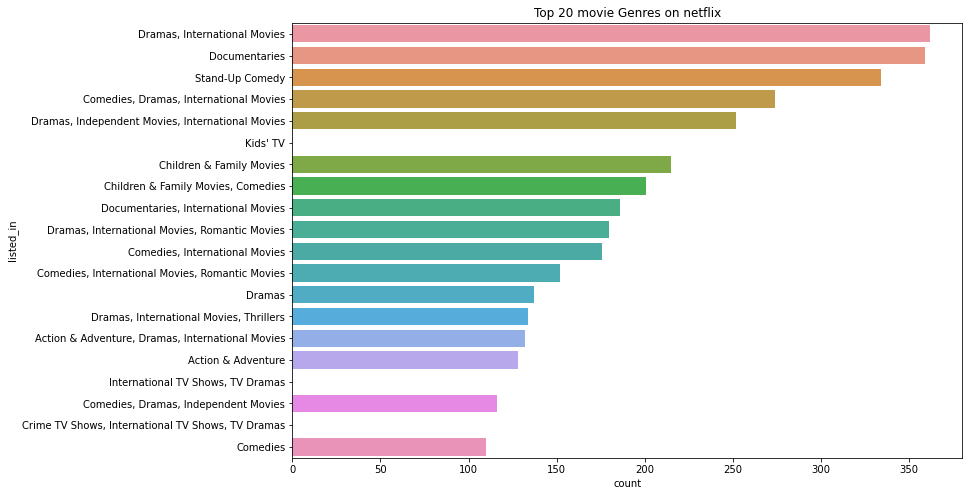

In [135]:
plt.figure(figsize=(12,8))
sns.countplot(y='listed_in',order=df['listed_in'].value_counts().index[0:20],data=movie)
plt.title("Top 20 movie Genres on netflix")
#now here we want to see which genres content watchEd most on netflix

Text(0.5, 1.0, 'Top 20 tv show Genres on netflix')

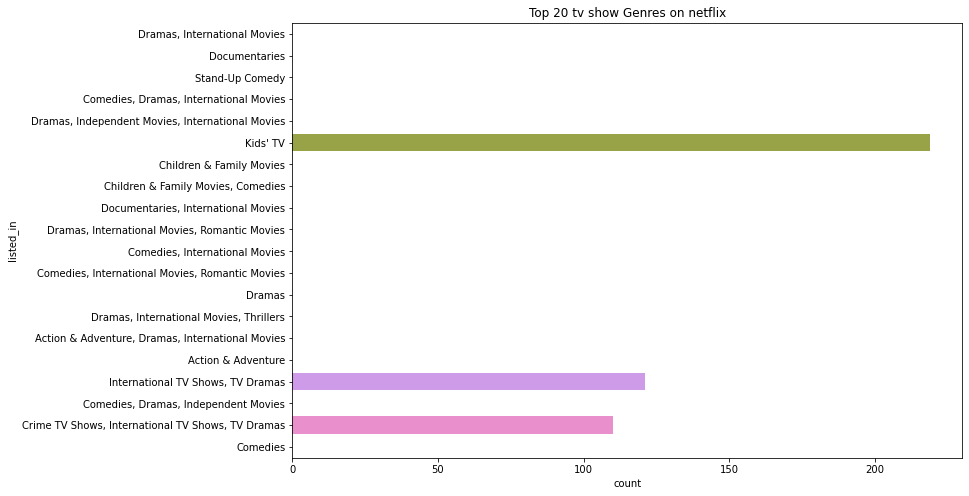

In [136]:
plt.figure(figsize=(12,8))
sns.countplot(y='listed_in',order=df['listed_in'].value_counts().index[0:20],data=tv_show)
plt.title("Top 20 tv show Genres on netflix")
#now here we want to see which genres content watchEd most on netflix

In [100]:
df.director.value_counts()[:10]
#now we want to see the director who direct the TV shows and movies on netflix most

Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Name: director, dtype: int64

Text(0.5, 1.0, 'Top 15 director who direct movies and tv shows on netflix')

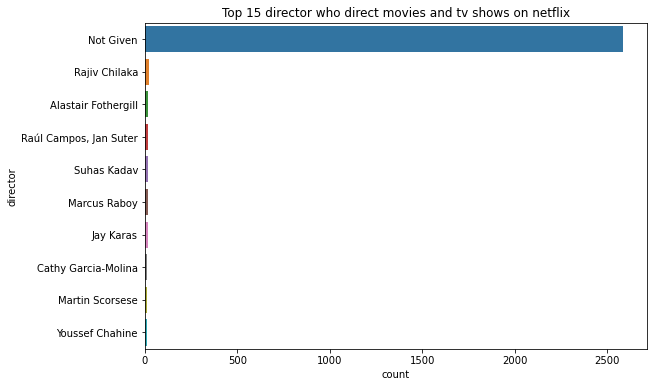

In [93]:
plt.figure(figsize=(9,6))
sns.countplot(y='director',order=df['director'].value_counts().index[0:10],data=df)
plt.title("Top 15 director who direct movies and tv shows on netflix")

Text(0.5, 1.0, 'Top 15 director who direct movies and tv shows on netflix')

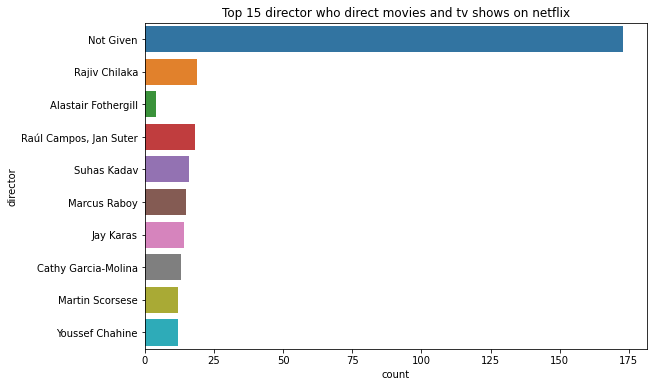

In [122]:
plt.figure(figsize=(9,6))
sns.countplot(y='director',order=df['director'].value_counts().index[0:10],data=movie)
plt.title("Top 15 director who direct movies and tv shows on netflix")

Text(0.5, 1.0, 'Top 15 director who direct movies and tv shows on netflix')

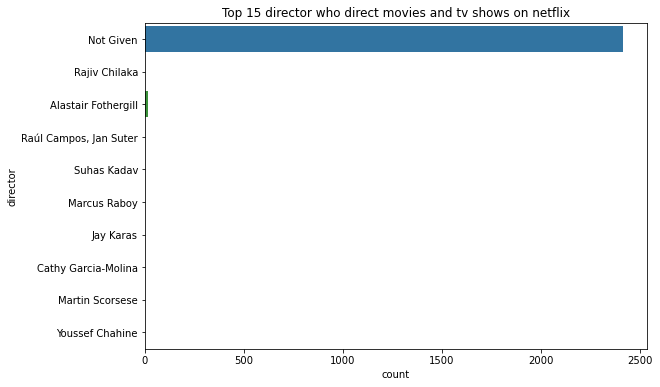

In [123]:
plt.figure(figsize=(9,6))
sns.countplot(y='director',order=df['director'].value_counts().index[0:10],data=tv_show)
plt.title("Top 15 director who direct movies and tv shows on netflix")

In [101]:
df.duration.value_counts()[:10]
#now we want to see max duration of content on netflix

1 Season     1791
2 Seasons     421
3 Seasons     198
90 min        152
97 min        146
93 min        146
94 min        146
91 min        144
95 min        137
96 min        130
Name: duration, dtype: int64

Text(0.5, 1.0, 'Top 10 movies and tv shows on netflix whose durations are high')

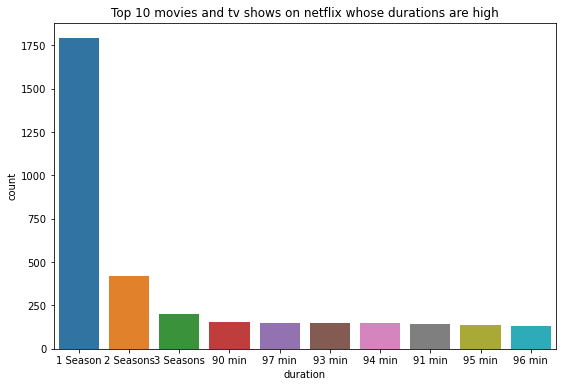

In [103]:
plt.figure(figsize=(9,6))
sns.countplot(x='duration',order=df['duration'].value_counts().index[0:10],data=df)
plt.title("Top 10 movies and tv shows on netflix whose durations are high")

Text(0.5, 1.0, 'Top 10 movies and tv shows on netflix whose durations are high')

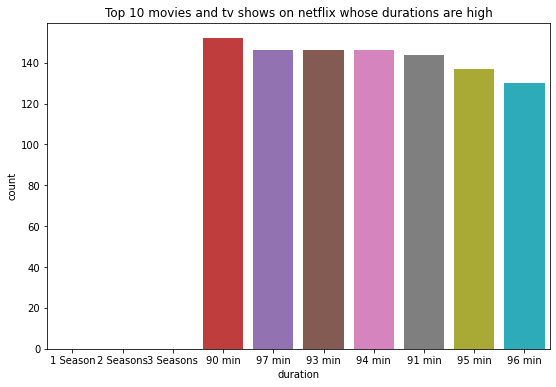

In [124]:
plt.figure(figsize=(9,6))
sns.countplot(x='duration',order=df['duration'].value_counts().index[0:10],data=movie)
plt.title("Top 10 movies and tv shows on netflix whose durations are high")

Text(0.5, 1.0, 'Top 10 movies and tv shows on netflix whose durations are high')

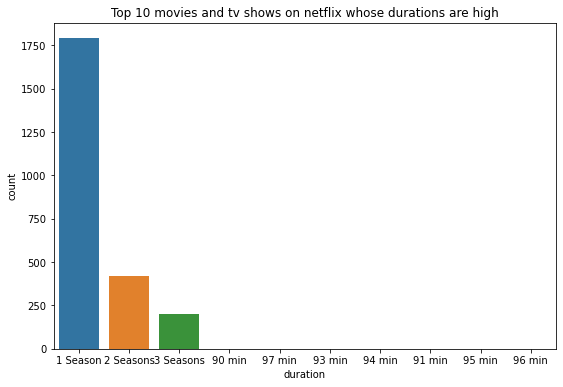

In [125]:
plt.figure(figsize=(9,6))
sns.countplot(x='duration',order=df['duration'].value_counts().index[0:10],data=tv_show)
plt.title("Top 10 movies and tv shows on netflix whose durations are high")

# summary 
#### The data type of date_added was incorrect 
#### The movie content is higher then Tv show
#### The country (US) was producing high amount of both type
#### At movie production site US still had high figures as compare to others
#### At Tv show production site US still had high figures but India had low figures 
#### By visualizing rating col the mature people were more interested to watch movie and tv show on netflix
#### The year in which both were watched mostly was 2018 meanwhile 2017 and 2019 had the same amount of figure yet in 2020 the TV industry had high rate of success 
#### In Greners Dramas and internation movies had the high rates than others, interestingly (kid's TV, international TV show, tv drama and crime TV show) had zero figure at movie industry but had maxium rate at tv show
#### Rajiv Chilaka was the director who direct most of TV show and movies on netfliex however only movie Rajiv Chilaka and Raul,Jan had same amount though Alastair had high ratio at tv show
#### The duration of season 1,2,3 had more ratio at combine level than other category. Although at individual level the rest of other had high percentage at movie industry meanwhile the season 1,2,3 holded their position at tv industry 